## Observations and Insights 

In [1]:
# Had help with this, used web searches and ideas from:
# https://github.com/ChristinaWuerz/Matplotlib-Homework/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb
# https://github.com/MAPatxot/matplotlib-challenge
# https://www.w3schools.com/python/matplotlib_plotting.asp
# https://www.w3schools.com/python/matplotlib_scatter.asp
# https://www.w3schools.com/python/matplotlib_bars.asp
# https://www.qimacros.com/box-and-whisker-plot-excel/?gclid=EAIaIQobChMIwZHF-vrE7QIV85FbCh2Y-Q2cEAAYASAAEgKXiPD_BwE
# could not get the outlier to show in the box plot
# With help from my tutor as well

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# look at sample data and determine best way to combine
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata,on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_df[merged_df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged_df[merged_df['Mouse ID']!='g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'var':grp.var(), 'std':grp.std(), 'sem':grp.sem()})


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen

# This method produces everything in a single groupby function
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

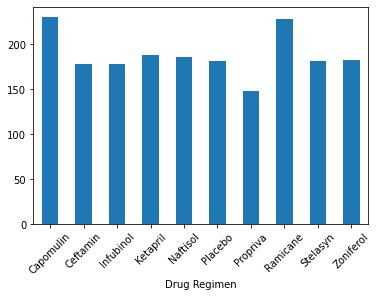

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df = clean.groupby('Drug Regimen')['Mouse ID'].count()
df.plot(kind='bar',rot=45)

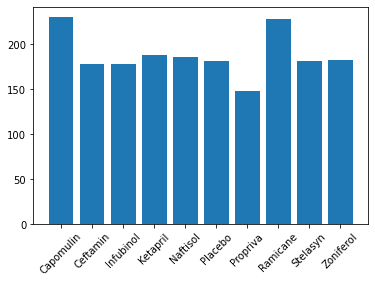

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(df.index,df)
plt.xticks(rotation = 45)
plt.show()

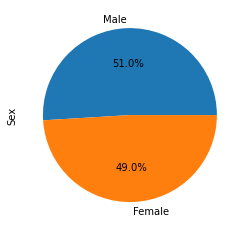

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df2 = clean.Sex.value_counts()
df2.plot(kind='pie', autopct='%1.1f%%')

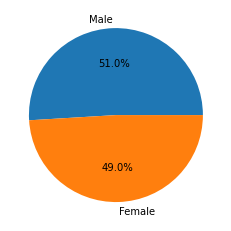

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df2, autopct='%1.1f%%', labels=df2.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTime = clean.groupby('Drug Regimen').max().Timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxTimeDf = clean.merge(maxTime, on=['Drug Regimen','Timepoint'])

In [130]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatmentList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def outliers():
    for treatment in treatments:

# Locate the rows which contain mice on each drug and get the tumor volumes
        df = maxTimeDf[maxTimeDf['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
         
        iqr = df.quantile(.75) - df.quantile(.25)
        lowBound = df.quantile(.25) - iqr*1.5
        upperBound = df.quantile(.75) + iqr*1.5

        print(f'{treatment} potential outliers: {df[(df<lowBound) | (df>upperBound)]}')
#         print(f'{treatment} potential outliers: {clean.loc[(clean["Tumor Volume (mm3)"] <= lowBound) & (clean["Tumor Volume (mm3)"] >= upperBound)],"Tumor Volume (mm3)"}')
        
        print(f'{treatment} min: {clean["Tumor Volume (mm3)"].min()} lowBound: {lowBound}')
    
# add subset 
        treatmentList.append(df)
        
# Determine outliers using upper and lower bounds
outliers()  

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin min: 22.05012627 lowBound: 20.70456164999999
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane min: 22.05012627 lowBound: 19.690480101250003
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol min: 22.05012627 lowBound: 55.35777559500001
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin min: 22.05012627 lowBound: 52.29350701999999


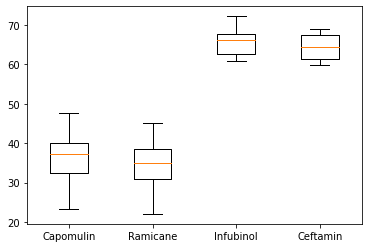

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(treatmentList,labels=treatments)
plt.show()

## Line and Scatter Plots

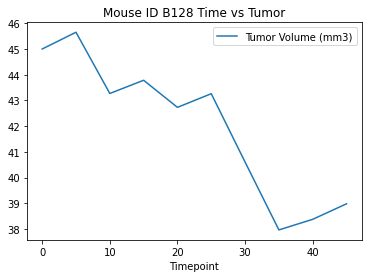

In [138]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean[clean['Mouse ID'] == 'b128'][['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint').plot()
plt.title('Mouse ID B128 Time vs Tumor')
plt.show()

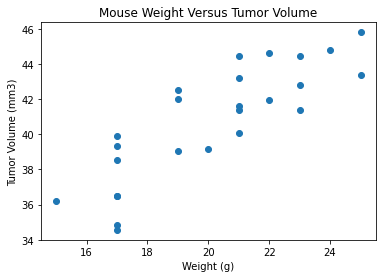

In [158]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = clean[clean['Drug Regimen'] == 'Capomulin']
dfAvg = cap.groupby('Mouse ID').mean()
plt.scatter(dfAvg['Weight (g)'], dfAvg['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


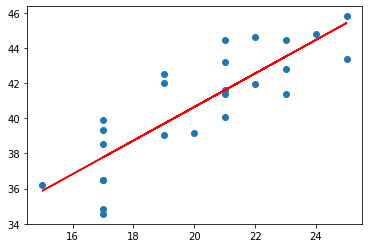

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
linear_corr = round(st.pearsonr(dfAvg['Weight (g)'], dfAvg['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and average tumor volume is {linear_corr}')
model = st.linregress(dfAvg['Weight (g)'],dfAvg['Tumor Volume (mm3)'])
y = dfAvg['Weight (g)']*model[0]+model[1]
plt.scatter(dfAvg['Weight (g)'], dfAvg['Tumor Volume (mm3)'])
plt.plot(dfAvg['Weight (g)'],y,color='red')